In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc
%matplotlib inline 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
df_train = pd.read_csv('./data/house_data/train.csv')
print(df_train.columns[:10])
print(df_train.head(3))
print(df_train.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities'],
      dtype='object')
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]
(1460, 81)


In [11]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False) #0인 값들을 제외한 항목들을 내림차순으로 정렬
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
missing_data.describe() #결측치 값으로 처리하지 않음

,Total,Percent
count,81.000000,81.000000
mean,85.987654,0.058896
std,302.829428,0.207417
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1453.000000,0.995205


In [22]:
##새로운 데이터 불러오기
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
exercise = sns.load_dataset("exercise")
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [19]:
titanic = sns.load_dataset("titanic")
titanic.head().T

,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22,38,26,35,35
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


In [18]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='species', ylabel='petal_length'>

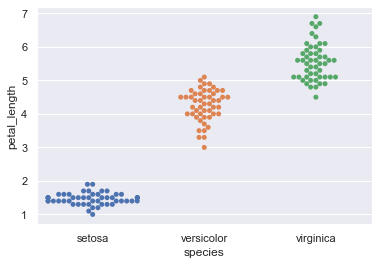

In [24]:
sns.set() # 초기화 시켜주기
sns.swarmplot(x="species", y="petal_length", data=iris) #분산값을 알려줌

<AxesSubplot:xlabel='species', ylabel='petal_width'>

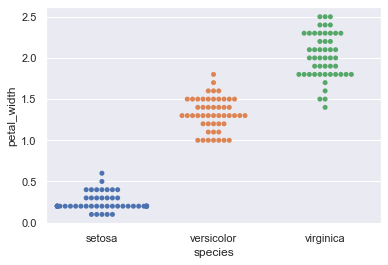

In [25]:
sns.swarmplot(x="species", y="petal_width", data=iris)

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

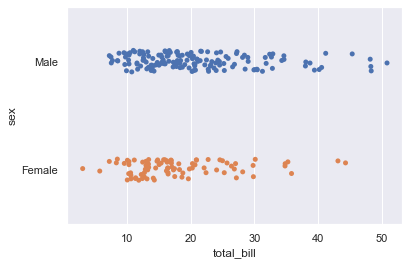

In [26]:
sns.stripplot(x="total_bill", y="sex", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

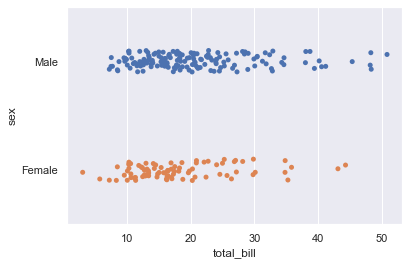

In [27]:
sns.stripplot(x="total_bill", y="sex", data=tips, jitter=True) #jitter=True : 동일한 곳에 여러번 찍히는것을 막아줌!

<AxesSubplot:xlabel='day', ylabel='total_bill'>

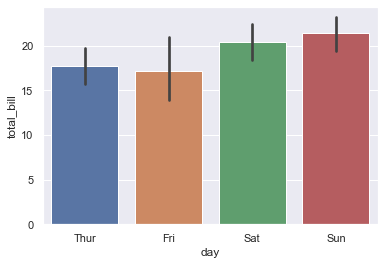

In [28]:
sns.barplot(x="day", y="total_bill", data=tips) # 검은색 줄은 편차를 나타내고, 막대 높이는 평균값을 의미

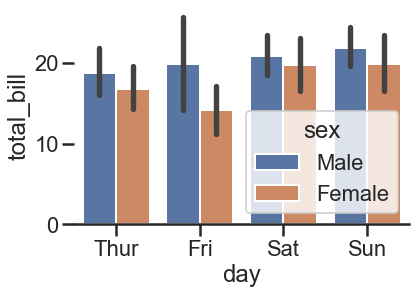

In [35]:
# sns.set_style('whitegrid')
# sns.set_style('dark')
sns.set_style('ticks') #가로줄이 있고 없고의 차이
# sns.set_context('poster')

sns.barplot(x="day", y="total_bill", hue="sex", data=tips) #hue는 그룹별로 나누어서 보게 해준다.

sns.despine(left=True) # 테두리 없애기